In [2]:
import pandas as pd
import numpy as np
import csv 
import matplotlib.pyplot as plt
import seaborn as sns


#https://altair-viz.github.io/gallery/errorbars_with_std.html
#import altair as alt
#from vega_datasets import data

#defining paths
allAlgorithms_unigram_900terms = './data/BERT-boxplotbaseH1H2H3-meta.csv'
#classifierChain = './experiment/dfTesteClassifierChain_13Labels.csv'

#TODO: Just replace with BERT data in TF-IDF format
dataBinary = pd.read_csv(allAlgorithms_unigram_900terms)
#dataClassifier = pd.read_csv(classifierChain)

In [3]:
dataBinary.head()

,Algorithm,Precision,Recall,Fmeasure_Score,hamming_loss,Accuracy_Score,Train/Test_Size,Project
0,Baseline,0.418842,0.468869,0.442446,0.457452,0.542548,0.4,audacity
1,Baseline,0.420264,0.606099,0.496358,0.476144,0.523856,0.4,audacity
2,Baseline,0.539474,0.416773,0.470251,0.363502,0.636498,0.4,audacity
3,Baseline,0.382593,0.536213,0.446561,0.514511,0.485489,0.4,audacity
4,Baseline,0.450339,0.506989,0.476987,0.430398,0.569602,0.4,audacity


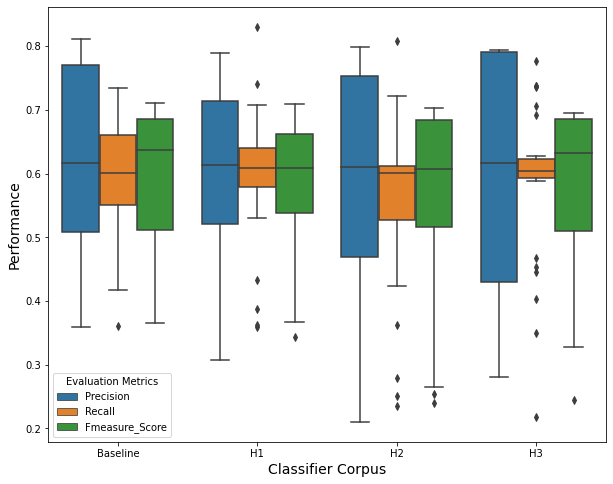

<ipython-input-4-75f8c7eb4a6e>:15: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dataBinary.mean(axis=0)


Precision          0.601930
Recall             0.585533
Fmeasure_Score     0.585226
hamming_loss       0.270972
Accuracy_Score     0.729028
Train/Test_Size    0.400000
dtype: float64

In [4]:
dd=pd.melt(dataBinary,id_vars=['Algorithm'],value_vars=['Precision','Recall','Fmeasure_Score'],var_name='Evaluation Metrics')

plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='value',x='Algorithm',data=dd,hue='Evaluation Metrics')
plt.ylabel("Performance", size=14)
plt.xlabel("Classifier Corpus",size=14)

labels=["Precision", "Recall", "F-measure"]
#h, l = ax.get_legend_handles_labels()
#ax.legend(h, labels, title="Evaluation Metrics",bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)
#plt.title("Evaluation Metrics by Hypothesis", size=12)
plt.savefig("H1H2H3Baseline-comparison.pdf")
plt.show()

dataBinary.mean(axis=0)



In [5]:
#dataBinary.groupby(['tf-IDF','#_TopTerms','Algorithm']).mean()
dataBinary.groupby(['Algorithm']).mean()


,Precision,Recall,Fmeasure_Score,hamming_loss,Accuracy_Score,Train/Test_Size
Algorithm,,,,,,
Baseline,0.616786,0.592654,0.596986,0.277028,0.722972,0.4
H1,0.599025,0.598794,0.591233,0.270646,0.729354,0.4
H2,0.595052,0.559079,0.568013,0.269647,0.730353,0.4
H3,0.597825,0.587186,0.582670,0.266674,0.733326,0.4


In [6]:
dataBinary.groupby(['Algorithm']).median()

,Precision,Recall,Fmeasure_Score,hamming_loss,Accuracy_Score,Train/Test_Size
Algorithm,,,,,,
Baseline,0.616751,0.601679,0.636998,0.192308,0.807692,0.4
H1,0.613378,0.608731,0.608495,0.253535,0.746465,0.4
H2,0.610717,0.600546,0.606689,0.193713,0.806287,0.4
H3,0.616633,0.603337,0.632791,0.192420,0.807580,0.4


In [7]:
dataBinary.nlargest(5,['Precision','Fmeasure_Score'])

,Algorithm,Precision,Recall,Fmeasure_Score,hamming_loss,Accuracy_Score,Train/Test_Size,Project
48,Baseline,0.811429,0.550032,0.655637,0.201305,0.798695,0.4,jabRef_2
68,H2,0.799224,0.595888,0.682738,0.193882,0.806118,0.4,jabRef_2
66,H2,0.797695,0.600385,0.685117,0.193207,0.806793,0.4,jabRef_2
63,H2,0.797441,0.600707,0.685233,0.193207,0.806793,0.4,jabRef_2
60,H2,0.797436,0.599422,0.684394,0.193545,0.806455,0.4,jabRef_2


In [8]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='AUC-PR',x='Algorithm',data=dataBinary)
plt.ylabel("AUCpr distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - AUCpr Analysis", size=12)
plt.show()


ValueError: Could not interpret input 'AUC-PR'

<Figure size 720x576 with 0 Axes>

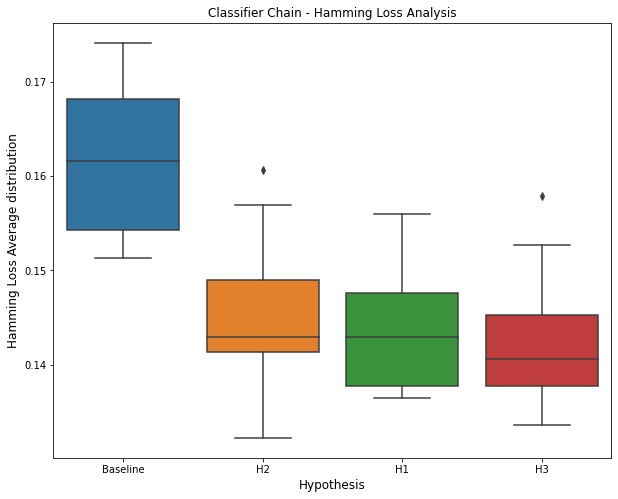

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='hamming_loss_avg',x='Algorithm',data=dataBinary)
plt.ylabel("Hamming Loss Average distribution", size=12)
plt.xlabel("Hypothesis",size=12)
plt.title("Classifier Chain - Hamming Loss Analysis", size=12)
plt.show()

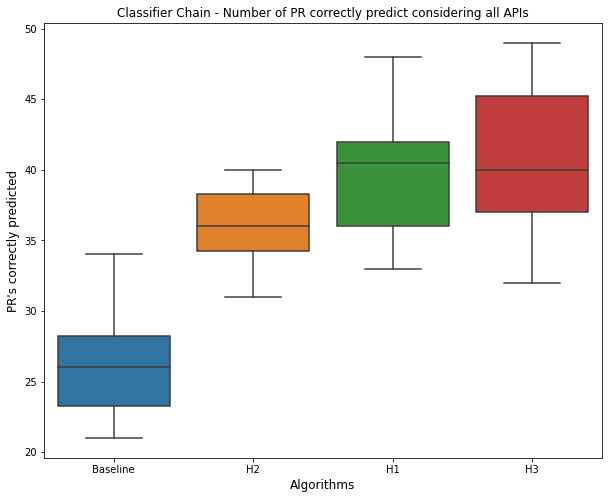

In [ ]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(y='Accuracy_Score_not_normalized',x='Algorithm',data=dataBinary)
plt.ylabel("PR's correctly predicted", size=12)
plt.xlabel("Algorithms",size=12)
plt.title("Classifier Chain - Number of PR correctly predict considering all APIs", size=12)
plt.show()

In [ ]:
def cliffsDelta(lst1, lst2, **dull):

    """Returns delta and true if there are more than 'dull' differences"""
    if not dull:
        dull = {'small': 0.147, 'medium': 0.33, 'large': 0.474} # effect sizes from (Hess and Kromrey, 2004)
    m, n = len(lst1), len(lst2)
    lst2 = sorted(lst2)
    j = more = less = 0
    for repeats, x in runs(sorted(lst1)):
        while j <= (n - 1) and lst2[j] < x:
            j += 1
        more += j*repeats
        while j <= (n - 1) and lst2[j] == x:
            j += 1
        less += (n - j)*repeats
    d = (more - less) / (m*n)
    size = lookup_size(d, dull)
    return d, size


def lookup_size(delta: float, dull: dict) -> str:
    """
    :type delta: float
    :type dull: dict, a dictionary of small, medium, large thresholds.
    """
    delta = abs(delta)
    if delta < dull['small']:
        return 'negligible'
    if dull['small'] <= delta < dull['medium']:
        return 'small'
    if dull['medium'] <= delta < dull['large']:
        return 'medium'
    if delta >= dull['large']:
        return 'large'


def runs(lst):
    """Iterator, chunks repeated values"""
    for j, two in enumerate(lst):
        if j == 0:
            one, i = two, 0
        if one != two:
            yield j - i, one
            i = j
        one = two
    yield j - i + 1, two

In [ ]:
#https://machinelearningmastery.com/effect-size-measures-in-python/
#Small Effect Size: d=0.20
#Medium Effect Size: d=0.50
#Large Effect Size: d=0.80

from numpy import mean
from numpy import var
from math import sqrt

def cohend(d1, d2):
	# calculate the size of samples
	n1, n2 = len(d1), len(d2)
	# calculate the variance of the samples
	s1, s2 = var(d1, ddof=1), var(d2, ddof=1)
	# calculate the pooled standard deviation
	s = sqrt(((n1 - 1) * s1 + (n2 - 1) * s2) / (n1 + n2 - 2))
	# calculate the means of the samples
	u1, u2 = mean(d1), mean(d2)
	# calculate the effect size
	return (u1 - u2) / s


In [ ]:
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Algorithm == 'Baseline']
Baseline_FMeasure = Baseline_binary['Fmeasure_Score']

H1_binary = dataBinary[dataBinary.Algorithm == 'H1']
H1_FMeasure = H1_binary['Fmeasure_Score']

H2_binary = dataBinary[dataBinary.Algorithm == 'H2']
H2_FMeasure = H2_binary['Fmeasure_Score']

H3_binary = dataBinary[dataBinary.Algorithm == 'H3']
H3_FMeasure = H3_binary['Fmeasure_Score']




In [ ]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(Baseline_FMeasure,H1_FMeasure, H2_FMeasure,H3_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=1.032, p=0.793
Same distributions (fail to reject H0)


In [ ]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(Baseline_FMeasure,H1_FMeasure,H2_FMeasure,H3_FMeasure)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')


ValueError: Unequal N in friedmanchisquare.  Aborting.

In [ ]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure, H1_FMeasure)
print('Baseline vs H1: Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure, H2_FMeasure)
print('Baseline vs H2: Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_FMeasure, H3_FMeasure)
print('Baseline vs H3: Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
# compare samples
stat, p = mannwhitneyu(H1_FMeasure, H2_FMeasure)
print('H1 vs H2: Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(H1_FMeasure, H3_FMeasure)
print('H1 vs H3: Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

# compare samples
stat, p = mannwhitneyu(H2_FMeasure, H3_FMeasure)
print('H2 vs H3: Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
#Effect_Size Baseline Vs others   
print(cliffsDelta(Baseline_FMeasure, H1_FMeasure))
print(cliffsDelta(Baseline_FMeasure, H2_FMeasure))
print(cliffsDelta(Baseline_FMeasure, H3_FMeasure))

#Effect_Size H1 Vs others
print(cliffsDelta(H1_FMeasure, H2_FMeasure))
print(cliffsDelta(H1_FMeasure, H3_FMeasure))

#Effect_Size H2 Vs others
print(cliffsDelta(H2_FMeasure, H3_FMeasure))



Baseline vs H1: Statistics=642.000, p=0.62234
Same distribution (fail to reject H0)
Baseline vs H2: Statistics=512.000, p=0.36316
Same distribution (fail to reject H0)
Baseline vs H3: Statistics=467.000, p=0.80726
Same distribution (fail to reject H0)
H1 vs H2: Statistics=664.000, p=0.45106
Same distribution (fail to reject H0)
H1 vs H3: Statistics=596.000, p=0.96687
Same distribution (fail to reject H0)
H2 vs H3: Statistics=408.000, p=0.53948
Same distribution (fail to reject H0)
(0.07, 'negligible')
(0.13777777777777778, 'negligible')
(0.03777777777777778, 'negligible')
(0.10666666666666667, 'negligible')
(-0.006666666666666667, 'negligible')
(-0.09333333333333334, 'negligible')


In [ ]:
#Effect_Size RandomForest Vs others   
print('Cohens d: %.3f' % cohend(RF_FMeasure, LogisticRegression_FMeasure))    
print('Cohens d: %.3f' % cohend(RF_FMeasure, MLPC_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, DT_FMeasure))
print('Cohens d: %.3f' % cohend(RF_FMeasure, MlkNN_FMeasure))

#Effect_Size LogisticRegression Vs others
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MLPC_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(LogisticRegression_FMeasure, MlkNN_FMeasure))    

#Effect_Size MLPC Vs others
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, DT_FMeasure))    
print('Cohens d: %.3f' % cohend(MLPC_FMeasure, MlkNN_FMeasure))    

#Effect_Size MlkNN Vs others
print('Cohens d: %.3f' % cohend(MlkNN_FMeasure,DT_FMeasure))    

NameError: name 'RF_FMeasure' is not defined

In [ ]:
### Wilcoxon paired and dependent samples

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

#from scipy.stats import wilcoxon

#stat, p = wilcoxon(data1, data2)
#print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
#alpha = 0.05
#if p > alpha:
#	print('Same distribution (fail to reject H0)')
#else:
#	print('Different distribution (reject H0)')

In [ ]:
###Precision analysis
#Subsetting data to compute Stats

Baseline_binary = dataBinary[dataBinary.Algorithm == 'Baseline']
Baseline_Precision = Baseline_binary['Precision']

H1_binary = dataBinary[dataBinary.Algorithm == 'H1']
H1_Precision = H1_binary['Precision']

H2_binary = dataBinary[dataBinary.Algorithm == 'H2']
H2_Precision = H2_binary['Precision']

H3_binary = dataBinary[dataBinary.Algorithm == 'H3']
H3_Precision = H3_binary['Precision']

In [ ]:
#### MANN-U Independent Samples
from scipy.stats import mannwhitneyu

#Fail to Reject H0: Sample distributions are equal.
#Reject H0: Sample distributions are not equal.

##### Defining variables to be comparede

# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H1_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H2_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
# compare samples
stat, p = mannwhitneyu(Baseline_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

# compare samples
stat, p = mannwhitneyu(H1_Precision, H2_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')

    # compare samples
stat, p = mannwhitneyu(H1_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
 
# compare samples
stat, p = mannwhitneyu(H2_Precision, H3_Precision)
print('Statistics=%.3f, p=%.5f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distribution (fail to reject H0)')
else:
	print('Different distribution (reject H0)')
    
#Effect_Size RandomForest Vs others   
print(cliffsDelta(Baseline_Precision, H1_Precision))
print(cliffsDelta(Baseline_Precision,H2_Precision))
print(cliffsDelta(Baseline_Precision, H3_Precision))

#Effect_Size H1 Vs others
print(cliffsDelta(H1_Precision,H2_Precision))
print(cliffsDelta(H1_Precision, H3_Precision))

#Effect_SizeH2 Vs others
print(cliffsDelta(H2_Precision, H3_Precision))



Statistics=4.000, p=0.00029
Different distribution (reject H0)
Statistics=6.000, p=0.00050
Different distribution (reject H0)
Statistics=6.000, p=0.00050
Different distribution (reject H0)
Statistics=48.000, p=0.45486
Same distribution (fail to reject H0)
Statistics=44.000, p=0.33879
Same distribution (fail to reject H0)
Statistics=46.000, p=0.39567
Same distribution (fail to reject H0)
(-0.92, 'large')
(-0.88, 'large')
(-0.88, 'large')
(0.04, 'negligible')
(-0.12, 'negligible')
(-0.08, 'negligible')


In [ ]:
##Kruskall Wallis - Group Comparison

#Fail to Reject H0: Paired sample distributions are equal.
#Reject H0: Paired sample distributions are not equal.
    
from scipy.stats import kruskal
# seed the random number generator


# compare samples
stat, p = kruskal(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=nan, p=nan
Different distributions (reject H0)


In [ ]:
#https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
from scipy.stats import friedmanchisquare

# compare samples
stat, p = friedmanchisquare(RF_Precision,LogisticRegression_Precision, MLPC_Precision,DT_Precision,MlkNN_Precision)
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

ZeroDivisionError: division by zero